# Task 1 (Time Series Analysis)

## Stock prices case

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

### Load data

In [23]:
data = pd.read_csv('NSE-TATAGLOBAL.csv')
print(data.head())

         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914   
1  2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859   
2  2018-09-26  240.00  240.00  232.50  235.00  234.25               2240909   
3  2018-09-25  233.30  236.75  232.00  236.25  236.10               2349368   
4  2018-09-24  233.55  239.20  230.75  234.00  233.30               3423509   

   Turnover (Lacs)  
0          7162.35  
1         11859.95  
2          5248.60  
3          5503.90  
4          7999.55  


### Preprocessing

In [25]:
# Parsing date
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
data.set_index('Date', inplace=True)

In [26]:
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [27]:
data.dtypes

,0
Open,float64
High,float64
Low,float64
Last,float64
Close,float64
Total Trade Quantity,int64
Turnover (Lacs),float64


In [28]:
data.isnull().sum()

,0
Open,0
High,0
Low,0
Last,0
Close,0
Total Trade Quantity,0
Turnover (Lacs),0


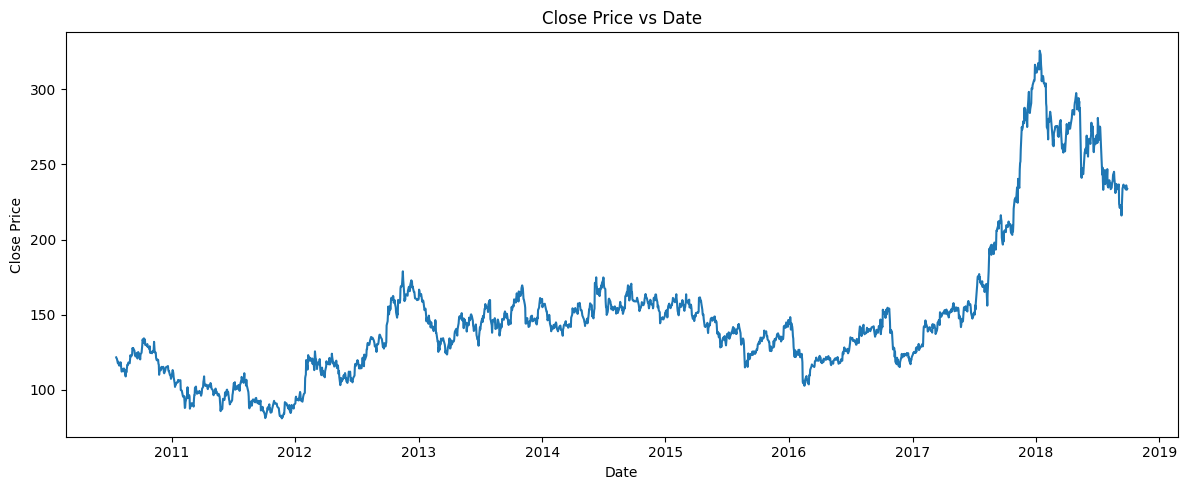

In [31]:
plt.figure(figsize=(12,5))
plt.plot(data['Close'])
plt.title('Close Price vs Date')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.tight_layout()
plt.show()

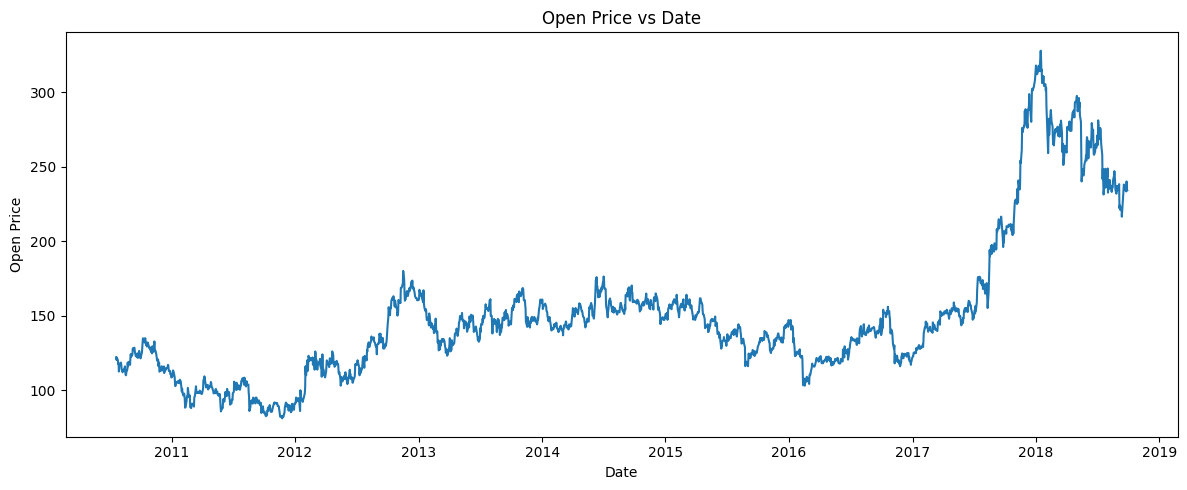

In [32]:
plt.figure(figsize=(12,5))
plt.plot(data['Open'])
plt.title('Open Price vs Date')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.tight_layout()
plt.show()

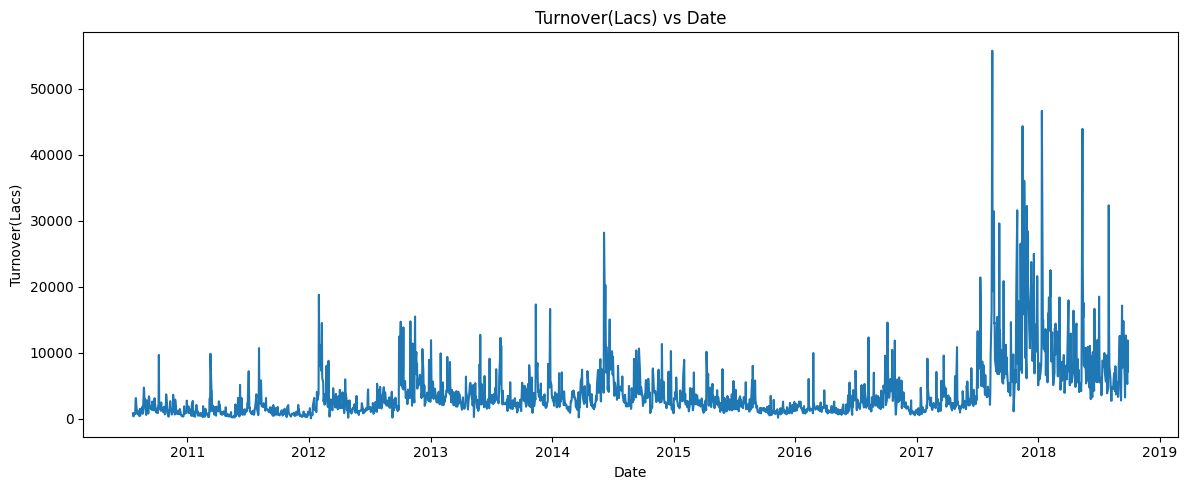

In [33]:
plt.figure(figsize=(12,5))
plt.plot(data['Turnover (Lacs)'])
plt.title('Turnover(Lacs) vs Date')
plt.xlabel('Date')
plt.ylabel('Turnover(Lacs)')
plt.tight_layout()
plt.show()

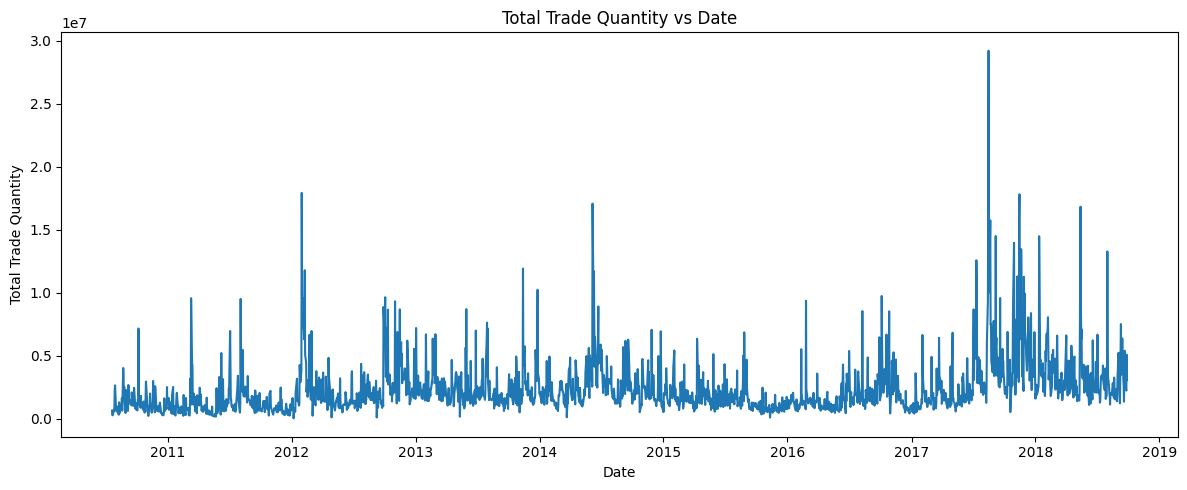

In [34]:
plt.figure(figsize=(12,5))
plt.plot(data['Total Trade Quantity'])
plt.title('Total Trade Quantity vs Date')
plt.xlabel('Date')
plt.ylabel('Total Trade Quantity')
plt.tight_layout()
plt.show()

### Decomposition

### Moving average

### Simple Exponential Smoothing

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


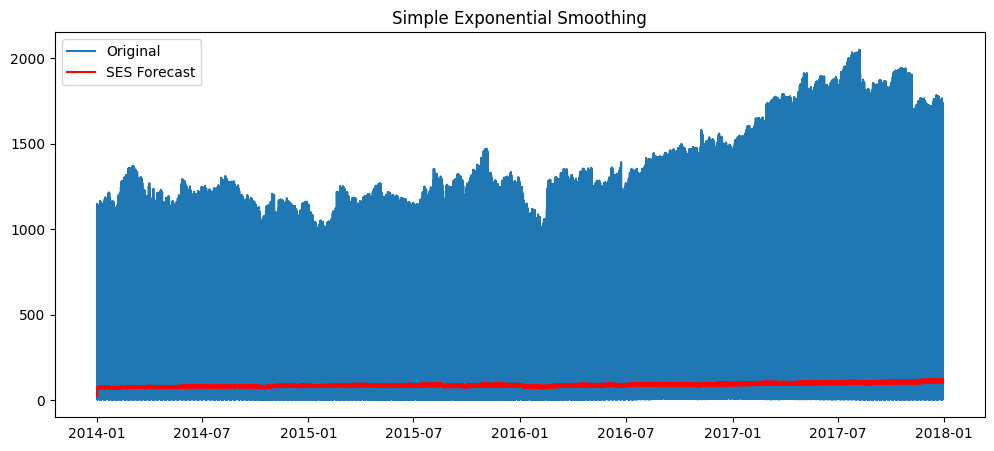

In [ ]:
ses_model = SimpleExpSmoothing(data).fit()
ses_forecast = ses_model.fittedvalues

plt.figure(figsize=(12,5))
plt.plot(data, label='Original')
plt.plot(ses_forecast, label='SES Forecast', color = 'red')
plt.title('Simple Exponential Smoothing')
plt.legend()
plt.show()

### Splitting data

In [ ]:
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

### Training process

#### ARIMA model

In [ ]:
arima_model = ARIMA(train, order=(5,1,0))
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.forecast(steps=len(test))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

#### SARIMA model

In [ ]:
sarima_model = SARIMAX(train, order=(5,1,0), seasonal_order=(1,1,0,12))
sarima_model_fit = sarima_model.fit()
sarima_forecast = sarima_model_fit.forecast(steps=len(test))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### Evaluate model

#### ARIMA

In [ ]:
rmse_arima = sqrt(mean_squared_error(test, arima_forecast))
print('RMSE ARIMA:', rmse_arima)

#### SARIMA

In [ ]:
rmse_arima = sqrt(mean_squared_error(test, sarima_forecast))
print('RMSE SARIMA:', rmse_arima)

### Visualize results

#### ARIMA

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(arima_forecast, label='ARIMA Forecast', color = 'red')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

#### SARIMA

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(sarima_forecast, label='SARIMA Forecast', color = 'red')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()